## PIMA diabetes looking into different sampling options

In [1]:
using Pkg
Pkg.activate("../")

  Activating project at `~/Coding/machine-learning-julia`


In [2]:
using CSV
using DataFrames
using HTTP
# using PlotlyJS
using VegaLite
using FreqTables
using StatsBase
using Statistics
# using StatsPlots
Pkg.status()

Status `~/Coding/machine-learning-julia/Project.toml`


  [336ed68f] CSV v0.10.4
  [8f4d0f93] Conda v1.7.0
  [a93c6f00] DataFrames v1.4.1
  [da1fdf0e] FreqTables v0.4.5
⌅ [cd3eb016] HTTP v0.9.17
  [7073ff75] IJulia v1.23.3
  [add582a8] MLJ v0.18.5
  [f0f68f2c] PlotlyJS v0.18.10
  [2913bbd2] StatsBase v0.33.21
  [f3b207a7] StatsPlots v0.15.4
  [112f6efa] VegaLite v2.6.0
Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated`


In [4]:
ENV["COLUMNS"]=120

120

In [5]:
url = "https://raw.githubusercontent.com/jameshtwose/example_deliverables/main/classification_examples/pima_diabetes/diabetes.csv"
df = DataFrame(CSV.File(HTTP.get(url).body));
df.index = range(1, size(df)[1])

1:768

In [6]:
df[!, 1: end-2] = mapcols!(ByRow(Float64), df[!, 1: end-2]);

In [7]:
first(df, 3)

Row,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,index
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64
1,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1,1
2,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0,2
3,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1,3


In [8]:
size(df)

(768, 10)

### Plot the amount of rows in each side of the target
#### Looks like the target is imbalanced so this needs to be taken into account

#### Also 0 values in everything apart from the target and `Pregnancies` are replaced by NaN values

In [9]:
target="Outcome";

In [10]:
feature_list = names(select(df, Not(target)))

9-element Vector{String}:
 "Pregnancies"
 "Glucose"
 "BloodPressure"
 "SkinThickness"
 "Insulin"
 "BMI"
 "DiabetesPedigreeFunction"
 "Age"
 "index"

In [19]:
tmp_df = select(df, Not([target, "index", "Pregnancies"]));
tmp_df = DataFrame(replace!(Matrix(tmp_df), 0=>NaN), names(tmp_df));
df[!, names(tmp_df)] = tmp_df;

In [20]:
describe(df, :all)

Row,variable,mean,std,min,q25,median,q75,max,nunique,nuniqueall,nmissing,nnonmissing,first,last,eltype
,Symbol,Float64,Float64,Real,Union…,Union…,Union…,Real,Nothing,Int64,Int64,Int64,Real,Real,DataType
1,Pregnancies,3.84505,3.36958,0.0,1.0,3.0,6.0,17.0,,17,0,768,6.0,1.0,Float64
2,Glucose,NaN,NaN,NaN,,,,NaN,,136,0,768,148.0,93.0,Float64
3,BloodPressure,NaN,NaN,NaN,,,,NaN,,47,0,768,72.0,70.0,Float64
4,SkinThickness,NaN,NaN,NaN,,,,NaN,,51,0,768,35.0,31.0,Float64
5,Insulin,NaN,NaN,NaN,,,,NaN,,186,0,768,NaN,NaN,Float64
6,BMI,NaN,NaN,NaN,,,,NaN,,248,0,768,33.6,30.4,Float64
7,DiabetesPedigreeFunction,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42,,517,0,768,0.627,0.315,Float64
8,Age,33.2409,11.7602,21.0,24.0,29.0,41.0,81.0,,52,0,768,50.0,23.0,Float64
9,Outcome,0.348958,0.476951,0,0.0,0.0,1.0,1,,2,0,768,1,0,Int64


In [24]:
first(df, 5)

Row,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,index
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64
1,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1,1
2,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0,2
3,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1,3
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,4
5,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1,5


In [21]:
ft = freqtable(df, target)
plot_df = DataFrame(target = names(ft)[1], Freq = ft)

Row,target,Freq
,Int64,Int64
1,0,500
2,1,268


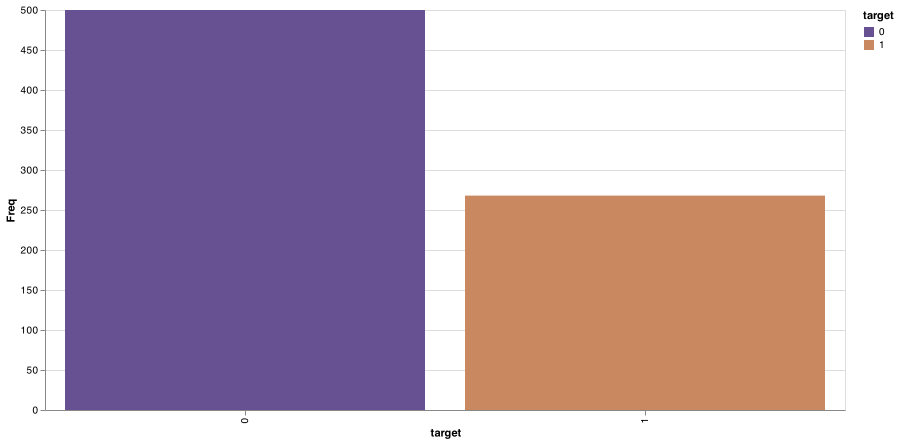

In [22]:
plot_df |>
@vlplot(:bar, 
        x="target:n", 
        y=:Freq, 
        width=800,
        height=400,
        color={"target:o", scale={range=["#675193", "#ca8861"]}})